# Data Preparation
## Loading libraries

In [1]:
# Packages for data analysis
import pandas as pd
import numpy as np

# Packages for visualisation 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme(style="darkgrid")

# Packages for machine learning
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# Others
import warnings
warnings.filterwarnings("ignore")

## Importing data

In [2]:
rain = pd.read_csv('weatherAUS.csv', parse_dates=['Date'])
rain.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0 2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1 2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2 2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3 2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4 2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [3]:
rain.sample(10)

Date       Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
120650 2008-07-13          Perth      5.3     18.8       0.2          1.0   
88510  2012-08-02         Cairns     13.1     25.6       0.0          6.4   
105842 2009-10-08        Woomera      8.0     21.8       0.0          8.2   
14419  2015-09-08          Moree      6.7     18.7       0.0          5.4   
46077  2009-03-05       Canberra     11.1     22.2       0.0         12.8   
21972  2011-06-03  NorfolkIsland     17.6     22.5       2.2          2.6   
116223 2013-08-20     PearceRAAF      4.9     19.4       0.0          NaN   
111383 2016-11-10         Albany      7.2     21.5       0.0          1.6   
92464  2015-04-02      GoldCoast     19.3     27.0       6.4          NaN   
25389  2012-06-15        Penrith      8.7     19.7       0.2          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
120650       2.3           N           17.0         NE  ...        96.0   
88510       10.9          SE           37.0         SE  ...        59.0   
105842      11.3          SE           35.0          E  ...        40.0   
14419       10.8          SW           44.0        SSW  ...        46.0   
46077       11.6         WNW           46.0        WNW  ...        42.0   
21972        8.0           N           33.0          N  ...        80.0   
116223       9.7         WSW           31.0        ENE  ...        90.0   
111383       NaN         NaN            NaN        SSW  ...        74.0   
92464        NaN           E           52.0        ESE  ...        75.0   
25389        NaN         WSW            9.0        NaN  ...       100.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
120650         63.0       1025.1       1024.1       7.0       6.0      9.5   
88510          46.0       1020.3       1016.5       2.0       2.0     19.4   
105842         18.0       1027.6       1025.1       1.0       2.0     13.1   
14419          25.0       1022.5       1020.2       0.0       0.0     13.8   
46077          22.0       1009.7       1008.5       1.0       2.0     13.5   
21972          73.0       1012.7       1011.7       1.0       3.0     20.4   
116223         48.0       1027.7       1025.2       1.0       3.0     12.4   
111383          NaN       1009.5       1005.7       5.0       NaN     15.5   
92464          99.0       1019.6       1016.6       NaN       NaN     25.8   
25389          70.0          NaN          NaN       NaN       NaN     10.6   

        Temp3pm  RainToday  RainTomorrow  
120650     17.2         No            No  
88510      24.2         No            No  
105842     19.5         No            No  
14419      18.1         No            No  
46077      20.6         No            No  
21972      21.0        Yes            No  
116223     18.8         No            No  
111383      NaN         No           Yes  
92464      23.1        Yes           Yes  
25389      18.9         No            No  

[10 rows x 23 columns]

## Data inspection

### Data types

In [4]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

##### Comment
- The data set has 23 columns, including 22 features and 1 target variable
- The data contains both numerical and categorical features

In [5]:
# Extract numerical features
num_cols=rain.select_dtypes(include=np.number).columns.tolist()
print('There are', len(num_cols), 'numerical features, including:')
print(num_cols, "\n")

# Extract categorical features
cat_cols=rain.select_dtypes(object).columns.tolist()
print('There are', len(cat_cols), 'categorical features, including:')
print(cat_cols)

There are 16 numerical features, including:
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm'] 

There are 6 categorical features, including:
['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


### Data quality

In [6]:
# Checking data completeness
missing = pd.DataFrame(rain.isnull().sum(), columns=['No. of missing values'])
missing['% missing_values'] = (missing/len(rain)).round(2)*100
missing

No. of missing values  % missing_values
Date                               0               0.0
Location                           0               0.0
MinTemp                         1485               1.0
MaxTemp                         1261               1.0
Rainfall                        3261               2.0
Evaporation                    62790              43.0
Sunshine                       69835              48.0
WindGustDir                    10326               7.0
WindGustSpeed                  10263               7.0
WindDir9am                     10566               7.0
WindDir3pm                      4228               3.0
WindSpeed9am                    1767               1.0
WindSpeed3pm                    3062               2.0
Humidity9am                     2654               2.0
Humidity3pm                     4507               3.0
Pressure9am                    15065              10.0
Pressure3pm                    15028              10.0
Cloud9am                       55888              38.0
Cloud3pm                       59358              41.0
Temp9am                         1767               1.0
Temp3pm                         3609               2.0
RainToday                       3261               2.0
RainTomorrow                    3267               2.0

<AxesSubplot:>

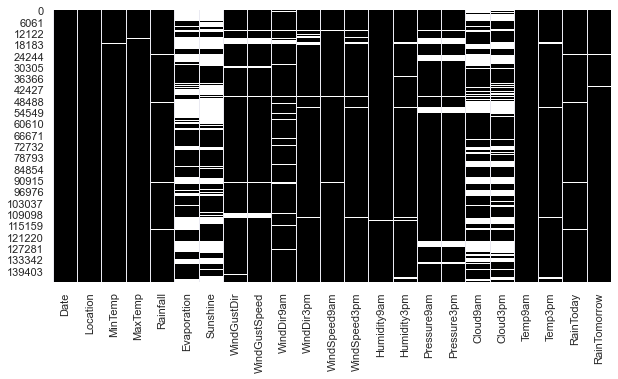

In [7]:
# Where are missing values located in the dataset (white color indicates missing values)
plt.figure(figsize=(10,5))
sns.heatmap(rain.isnull(), cbar = False, cmap="gray")

##### Comment
- `Evaporation`, `Sunshine`, `Cloud9am`, `Cloud3pm` contain a lot of missing values (i.e 30-50% of the cell is empty) throughout the dataset.
- Therefore we will drop `Evaporation`, `Sunshine`, `Cloud9am`, `Cloud3pm` from the dataset
- The target variable `RainTomorrow` has two missing data, we will drop these two rows from the dataset
- For other features, there is a small number of data missing, we will handle these missing values with an appropriate method later in the study

In [8]:
# Drop features that have a significant proportion of missing values
rain.drop(['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'], axis=1, inplace=True)

# Remove rows where target variables are missing
rain.dropna(how='all', subset=['RainTomorrow'], inplace=True) # Remove rows where target varible is missing

### Data summary
#### A quick glance at `Categorical Features`

In [9]:
print('There are', len(cat_cols), 'categorical features, including:', "\n", cat_cols, '\n')
# Extract details on categorical features
for i in cat_cols:
    unique_no = rain[i].nunique()
    unique_name = rain[i].unique().tolist()
    print(i, 'has', unique_no, 'unique variables, including:')
    print(unique_name, "\n")

There are 6 categorical features, including: 
 ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow'] 

Location has 49 unique variables, including:
['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree', 'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond', 'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown', 'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat', 'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura', 'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns', 'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa', 'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport', 'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston', 'AliceSprings', 'Darwin', 'Katherine', 'Uluru'] 

WindGustDir has 16 unique variables, including:
['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE', 'S', 'NW', 'SE', 'ESE', nan, 'E', 'SSW'] 

WindDir9am has 16 unique variables, includ

##### Comment
- There are 6 categorical features, with 2 to 49 unique names in each features. 
- We will need to convert these categorized values to numerical values later in the study

#### A quick glance at `Numerical Features`

In [10]:
rain.describe()

MinTemp        MaxTemp       Rainfall  WindGustSpeed  \
count  141556.000000  141871.000000  140787.000000  132923.000000   
mean       12.186400      23.226784       2.349974      39.984292   
std         6.403283       7.117618       8.465173      13.588801   
min        -8.500000      -4.800000       0.000000       6.000000   
25%         7.600000      17.900000       0.000000      31.000000   
50%        12.000000      22.600000       0.000000      39.000000   
75%        16.800000      28.200000       0.800000      48.000000   
max        33.900000      48.100000     371.000000     135.000000   

        WindSpeed9am   WindSpeed3pm    Humidity9am    Humidity3pm  \
count  140845.000000  139563.000000  140419.000000  138583.000000   
mean       14.001988      18.637576      68.843810      51.482606   
std         8.893337       8.803345      19.051293      20.797772   
min         0.000000       0.000000       0.000000       0.000000   
25%         7.000000      13.000000      57.000000      37.000000   
50%        13.000000      19.000000      70.000000      52.000000   
75%        19.000000      24.000000      83.000000      66.000000   
max       130.000000      87.000000     100.000000     100.000000   

         Pressure9am    Pressure3pm        Temp9am        Temp3pm  
count  128179.000000  128212.000000  141289.000000  139467.000000  
mean     1017.653758    1015.258204      16.987509      21.687235  
std         7.105476       7.036677       6.492838       6.937594  
min       980.500000     977.100000      -7.200000      -5.400000  
25%      1012.900000    1010.400000      12.300000      16.600000  
50%      1017.600000    1015.200000      16.700000      21.100000  
75%      1022.400000    1020.000000      21.600000      26.400000  
max      1041.000000    1039.600000      40.200000      46.700000

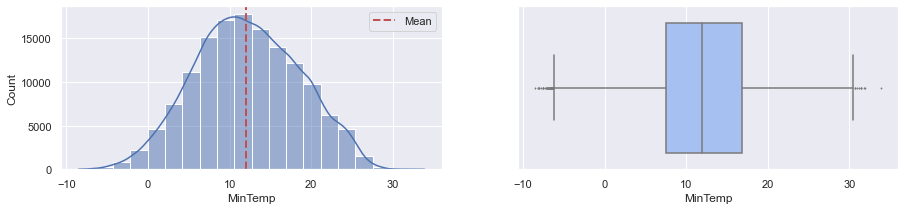

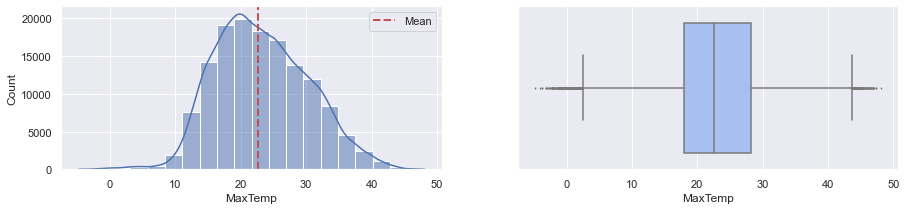

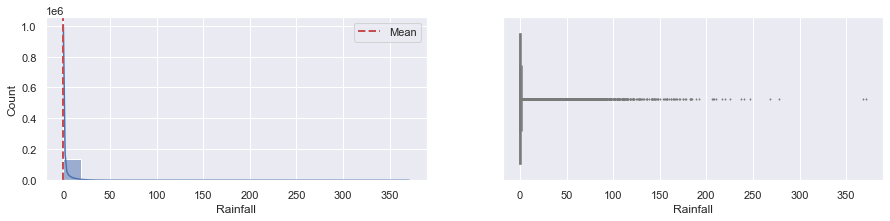

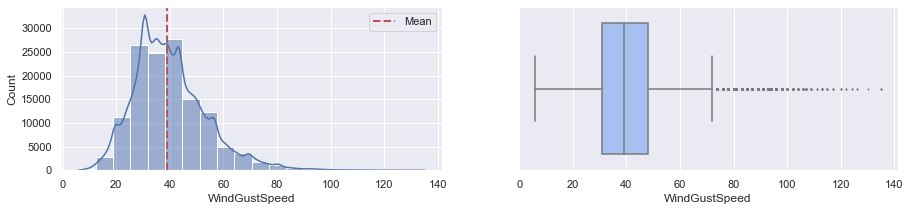

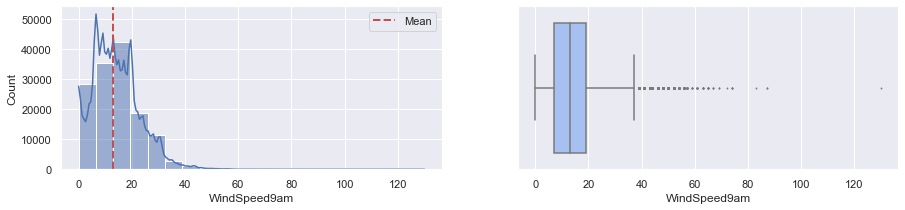

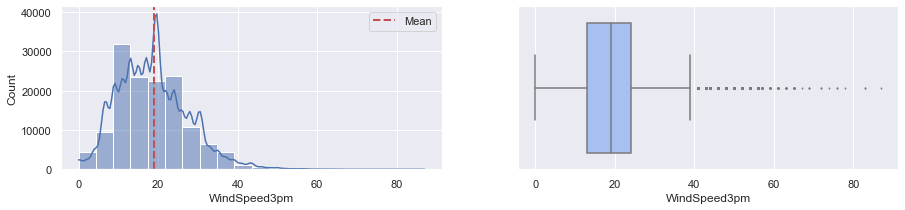

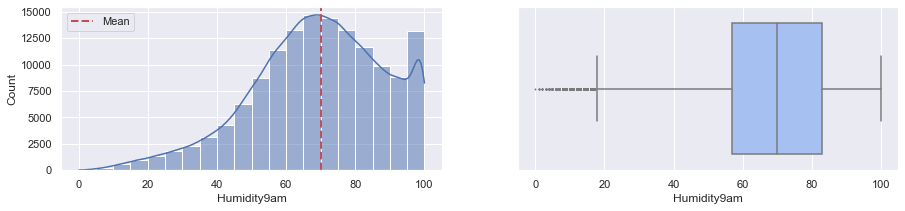

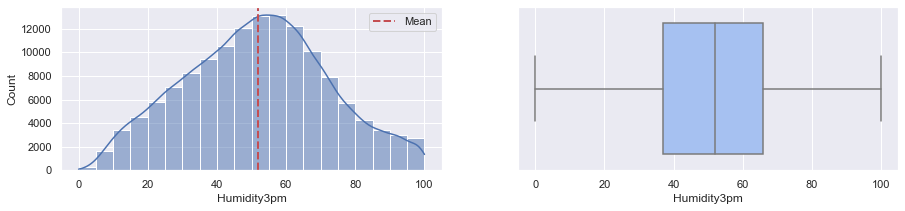

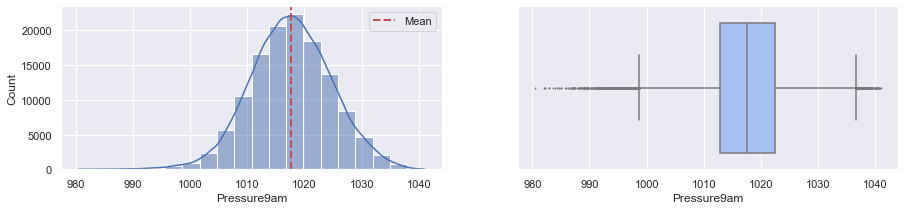

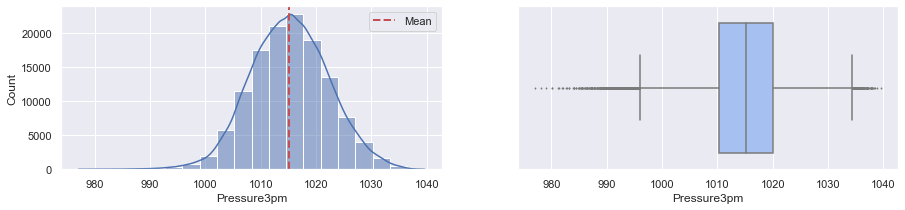

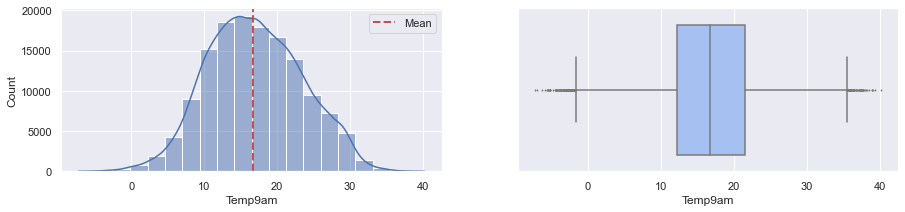

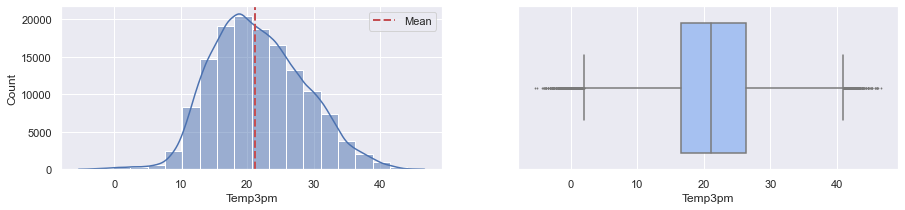

In [11]:
# Plots on numerical features to check data quality and data distribution

num_cols=rain.select_dtypes(include=['int64','float64']).columns.tolist() # a revised list of numerical features  

for i in num_cols:
   
    fig, axs = plt.subplots(1,2,figsize=(15, 3))

    sns.histplot(rain[i],bins=20, kde=True,ax=axs[0]);
    sns.boxplot(rain[i], ax = axs[1], color='#99befd', fliersize=1);
    
    axs[0].axvline(rain[i].median(), color='r', linewidth=2, linestyle='--', label='Mean')
    axs[0].legend()

##### Comment
- The mean values for different features range from 10+ to 1000+, as these features are not in a similar scale, we may need to adjust features sizes later in the study
- The `Rainfall` data seems to have a huge distortion.

# Exploratory Data Analysis (EDA)
### Target variable: `RainTomorrow`

<AxesSubplot:ylabel='RainTomorrow'>

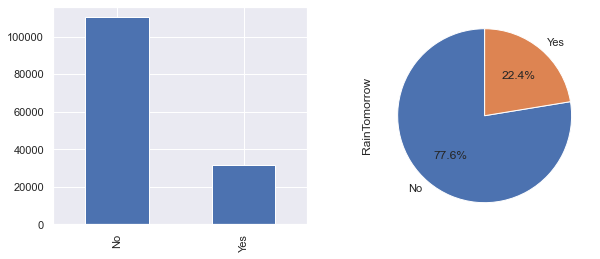

In [12]:
fig, axs = plt.subplots(ncols=2, figsize=(10,4))
rain['RainTomorrow'].value_counts().plot(kind='bar', ax=axs[0])
rain['RainTomorrow'].value_counts().plot.pie(autopct='%1.1f%%', startangle = 90, ax=axs[1])

##### Comment
- The target variable `RainTomorrow` returns two values, 'Yes' and 'No'
- 78% of result is 'Yes' and 22% is 'No'
- This is an example of imbalanced classification, as we have uneven distribution of classes in the training dataset. We will address this problem in the Machine Learning section

#### `Location`: Which city has the most raining days?

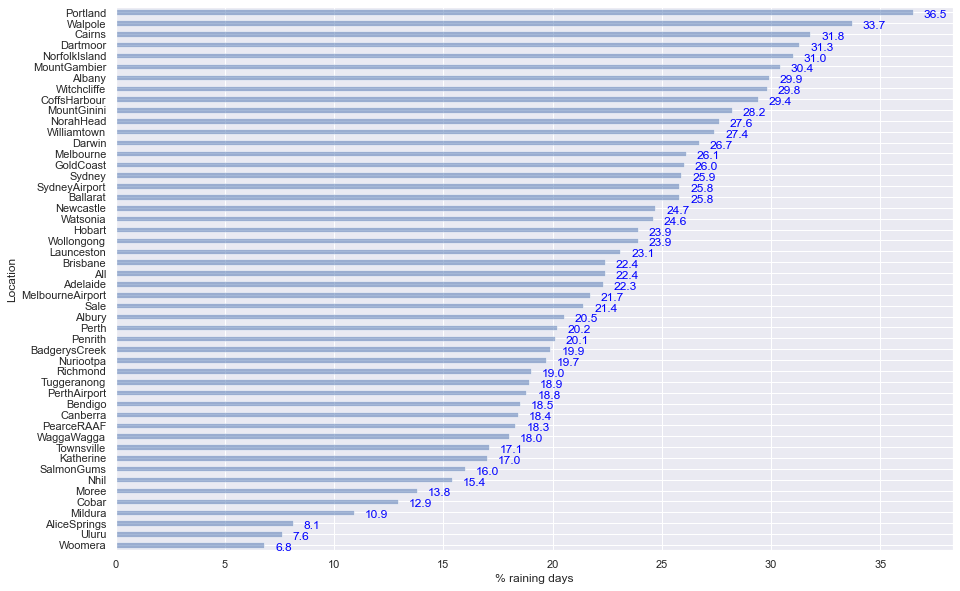

In [13]:
#rain_by_location =rain.groupby('Location')['RainTomorrow'].count()/rain['Location'].count()
rain_by_location = pd.crosstab(index=rain['Location'], columns=rain['RainTomorrow'], values=rain['RainTomorrow'], aggfunc='count', margins=True)
rain_by_location['% Yes'] = (rain_by_location['Yes']/rain_by_location['All']).round(3)*100
# rain_by_location.sort_values(by='% Yes', ascending=False)
f, ax = plt.subplots(figsize=(15,10))
rain_by_location['% Yes'].sort_values().plot(kind='barh', alpha=0.5)
ax.set_xlabel ('% raining days')

# Label values 
y = rain_by_location['% Yes'].sort_values().values
for h, v in enumerate(y):
    ax.text(v+0.5 , h-0.5 , round(float(v),1), color='blue')

##### Comment
- Portland, Walpole, Cairns are the top3 locations in terms of number of raining days
- Woomera, Uluru, AliceSprings are the bottom 3 of the list, with less than 10% of raining days

Text(0, 0.5, '% Raining days')

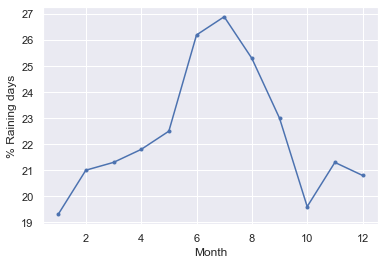

In [14]:
# Extract `Year` and 'Month' information from Date
rain['Year'] = pd.DatetimeIndex(rain['Date']).year
rain['Month'] = pd.DatetimeIndex(rain['Date']).month

rain_month = pd.crosstab(index=rain['Month'], columns=rain['RainTomorrow'], margins=True)
rain_month['%Yes'] = (rain_month['Yes'] / rain_month['All']).round(3)*100 
rain_month.iloc[:-1,-1].plot(style='.-')
plt.xlabel('Month')
plt.ylabel('% Raining days')

##### Comment
- Higher chance of raining between June and August

## Machine Learning

### Data preprocessing
We need to:
- Impute missing values 
    - For categorical values, I will replace missing values with the most frequent value of that feature column
    - For numerical values, I will replace missing values with median values
- Convert categorical values to numerical values
    - I will use LabelEncoder to transform the data
- Adjust features sizes
    - I will use StandardScaler to transform numerical features

In [15]:
# Lists for Categorized and Numerical features
cat_cols=rain.select_dtypes(object).columns.tolist()
num_cols=rain.select_dtypes(include=np.number).columns.tolist()

In [16]:
# Convert categorized values to numerical values
le = LabelEncoder()
rain[cat_cols] = rain[cat_cols].astype('str').apply(le.fit_transform)

In [17]:
# Impute missing values for categorical features
mode_values=rain[cat_cols].mode()
rain[cat_cols] = rain[cat_cols].fillna(value=mode_values)

# Impute missing values for numerical features
median_values = rain[num_cols].median()
rain[num_cols] = rain[num_cols].fillna(value=median_values)

In [18]:
# Check if there is any missing values
rain.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Year             0
Month            0
dtype: int64

## Modelling

In [19]:
rain.shape

(142193, 21)

In [20]:
rain=pd.DataFrame(rain)

In [21]:
rain.head()

Date  Location  MinTemp  MaxTemp  Rainfall  WindGustDir  \
0 2008-12-01         2     13.4     22.9       0.6           13   
1 2008-12-02         2      7.4     25.1       0.0           14   
2 2008-12-03         2     12.9     25.7       0.0           15   
3 2008-12-04         2      9.2     28.0       0.0            4   
4 2008-12-05         2     17.5     32.3       1.0           13   

   WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  ...  Humidity9am  \
0           44.0          13          14          20.0  ...         71.0   
1           44.0           6          15           4.0  ...         44.0   
2           46.0          13          15          19.0  ...         38.0   
3           24.0           9           0          11.0  ...         45.0   
4           41.0           1           7           7.0  ...         82.0   

   Humidity3pm  Pressure9am  Pressure3pm  Temp9am  Temp3pm  RainToday  \
0         22.0       1007.7       1007.1     16.9     21.8          0   
1         25.0       1010.6       1007.8     17.2     24.3          0   
2         30.0       1007.6       1008.7     21.0     23.2          0   
3         16.0       1017.6       1012.8     18.1     26.5          0   
4         33.0       1010.8       1006.0     17.8     29.7          0   

   RainTomorrow  Year  Month  
0             0  2008     12  
1             0  2008     12  
2             0  2008     12  
3             0  2008     12  
4             0  2008     12  

[5 rows x 21 columns]

In [22]:
X=rain.drop(columns=['Date','RainTomorrow'])
y=rain['RainTomorrow']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [24]:
results = []
clf=RandomForestClassifier()
# Fitting model
clf.fit(X_train, y_train)  
# Predict target value     
y_pred = clf.predict(X_test)      
    
# Calculate the accuracy of the model
score = clf.score(X_test, y_test).round(3)*100 
    
# Calculate the precision score of the model
precision = precision_score(y_test, y_pred).round(3)*100
    
# Calculate the recall score of the model
recall = recall_score(y_test, y_pred).round(3)*100
    
# Calculate the F1 score of the model
f1 = f1_score(y_test, y_pred).round(3)*100
    
 # Calculaate the ROC_AUC score
try:
    y_pred_prob = clf.predict_proba(X_test) [:,1]
except:
    roc = 'N.A'        
else: 
        roc = roc_auc_score(y_test, y_pred_prob).round(3)*100 


In [25]:
results.append([score, precision, recall, f1, roc])
    
results = pd.DataFrame(results, columns=['Accuracy','Precision', 'Recall', 'F1', 'ROC_AUC'])
print("The results of Random Forest model :","\n",results)

The results of Random Forest model : 
    Accuracy  Precision  Recall    F1  ROC_AUC
0      85.4       75.9    50.6  60.7     87.8


In [26]:
import pickle
file=open("rain.pkl","wb")
pickle.dump(clf,file)
file.close()

In [27]:
rainpred=pickle.load(open('rain.pkl','rb'))

In [28]:
X_test.iloc[1]

Location           43.0
MinTemp            13.2
MaxTemp            18.3
Rainfall            0.0
WindGustDir         0.0
WindGustSpeed      48.0
WindDir9am          2.0
WindDir3pm          2.0
WindSpeed9am       24.0
WindSpeed3pm       20.0
Humidity9am        73.0
Humidity3pm        73.0
Pressure9am      1027.6
Pressure3pm      1023.8
Temp9am            14.2
Temp3pm            17.0
RainToday           0.0
Year             2009.0
Month              10.0
Name: 127128, dtype: float64

In [29]:
y_test.iloc[1]

0

In [30]:
#change the input data to a numpy array
datapoint=np.array(X_test.iloc[1])
#reshape the numpy array as we are predicting for only one instance
datapoint=datapoint.reshape(1,-1)

prediction=rainpred.predict(datapoint)
print(prediction)

[0]


In [31]:
import lime
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=[0,1],
    mode='classification'
)

In [32]:
exp = explainer.explain_instance(
    data_row=X_test.iloc[1], 
    predict_fn=clf.predict_proba)

exp.show_in_notebook(show_table=True)

In [33]:
X_test.iloc[42]

Location           47.0
MinTemp            10.3
MaxTemp            15.4
Rainfall            8.0
WindGustDir         8.0
WindGustSpeed      56.0
WindDir9am         11.0
WindDir3pm         12.0
WindSpeed9am       41.0
WindSpeed3pm       11.0
Humidity9am        75.0
Humidity3pm        81.0
Pressure9am      1022.8
Pressure3pm      1023.2
Temp9am            13.6
Temp3pm            14.2
RainToday           1.0
Year             2014.0
Month               9.0
Name: 44562, dtype: float64

In [34]:
y_test.iloc[42]

1

In [35]:
#change the input data to a numpy array
datapoint=np.array(X_test.iloc[42])
#reshape the numpy array as we are predicting for only one instance
datapoint=datapoint.reshape(1,-1)

prediction=rainpred.predict(datapoint)
print(prediction)

[1]


In [36]:
exp = explainer.explain_instance(
    data_row=X_test.iloc[42], 
    predict_fn=clf.predict_proba)

exp.show_in_notebook(show_table=True)

In [37]:
X_test.iloc[100]

Location           34.0
MinTemp             2.2
MaxTemp            19.9
Rainfall            0.0
WindGustDir        10.0
WindGustSpeed      19.0
WindDir9am         16.0
WindDir3pm          4.0
WindSpeed9am        0.0
WindSpeed3pm        6.0
Humidity9am        81.0
Humidity3pm        37.0
Pressure9am      1025.8
Pressure3pm      1022.7
Temp9am            10.7
Temp3pm            19.4
RainToday           0.0
Year             2012.0
Month               5.0
Name: 28368, dtype: float64

In [38]:
y_test.iloc[100]

0

In [39]:
#change the input data to a numpy array
datapoint=np.array(X_test.iloc[100])
#reshape the numpy array as we are predicting for only one instance
datapoint=datapoint.reshape(1,-1)

prediction=rainpred.predict(datapoint)
print(prediction)

[0]


In [40]:
exp = explainer.explain_instance(
    data_row=X_test.iloc[100], 
    predict_fn=clf.predict_proba)

exp.show_in_notebook(show_table=True)

In [41]:
X_test.iloc[154]

Location           42.0
MinTemp            10.5
MaxTemp            28.0
Rainfall            0.0
WindGustDir        15.0
WindGustSpeed      26.0
WindDir9am          1.0
WindDir3pm          6.0
WindSpeed9am       13.0
WindSpeed3pm        7.0
Humidity9am        65.0
Humidity3pm        32.0
Pressure9am      1018.8
Pressure3pm      1016.7
Temp9am            15.4
Temp3pm            27.4
RainToday           0.0
Year             2013.0
Month               3.0
Name: 37984, dtype: float64

In [42]:
y_test.iloc[154]

0

In [43]:
#change the input data to a numpy array
datapoint=np.array(X_test.iloc[154])
#reshape the numpy array as we are predicting for only one instance
datapoint=datapoint.reshape(1,-1)

prediction=rainpred.predict(datapoint)
print(prediction)

[0]


In [44]:
exp = explainer.explain_instance(
    data_row=X_test.iloc[154], 
    predict_fn=clf.predict_proba)

exp.show_in_notebook(show_table=True)

In [45]:
y_test.iloc[200]

0

In [46]:
y_test.iloc[700]

1

In [47]:
datapoint=np.array(X_test.iloc[700])
#reshape the numpy array as we are predicting for only one instance
datapoint=datapoint.reshape(1,-1)

prediction=rainpred.predict(datapoint)
print(prediction)

[1]


In [48]:
exp = explainer.explain_instance(
    data_row=X_test.iloc[700], 
    predict_fn=clf.predict_proba)

exp.show_in_notebook(show_table=True)

In [49]:
X.iloc[0]

Location            2.0
MinTemp            13.4
MaxTemp            22.9
Rainfall            0.6
WindGustDir        13.0
WindGustSpeed      44.0
WindDir9am         13.0
WindDir3pm         14.0
WindSpeed9am       20.0
WindSpeed3pm       24.0
Humidity9am        71.0
Humidity3pm        22.0
Pressure9am      1007.7
Pressure3pm      1007.1
Temp9am            16.9
Temp3pm            21.8
RainToday           0.0
Year             2008.0
Month              12.0
Name: 0, dtype: float64

In [50]:
y.iloc[0]

0

In [51]:
import shap

In [52]:
#explainer = shap.TreeExplainer(clf)
#shap_values = explainer.shap_values(X)

In [53]:
#shap.force_plot(explainer.expected_value, shap_values[0, :], X.iloc[0, :])